In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
df = pd.read_csv("Mumbai1.csv")
df.sample(5)

,Unnamed: 0,Price,Area,Location,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
5896,5896,7600000,975,Mira Road East,2,0,0,1,0,0,0,1,0,1,0,0,1,0,0
3417,3417,8700000,585,Goregaon West,1,0,1,1,1,0,1,1,1,1,0,0,1,1,1
1113,1113,5500000,649,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,1,0
1410,1410,4000000,765,Manvel pada Road,2,0,0,1,1,1,1,0,0,0,1,0,0,0,0
2315,2315,13500000,1066,Malad West,2,1,1,1,0,0,0,0,0,1,0,0,0,0,0


In [12]:
df1 = df.drop(['Unnamed: 0','New/Resale','Gymnasium','Maintenance Staff','24x7 Security',"Children's Play Area",'Clubhouse','Intercom','Landscaped Gardens','Indoor Games','Gas Connection','Jogging Track','Swimming Pool'],axis='columns')
df1.sample(5)

,Price,Area,Location,No. of Bedrooms,Lift Available,Car Parking
905,9300000,1150,Kharghar,2,1,1
6174,16800000,830,Goregaon West,1,1,1
968,28400000,1733,Thane West,3,0,1
3095,14000000,768,Kandivali West,2,1,1
1049,33000000,1667,Kandivali East,3,1,1


In [13]:
df1.isnull().sum()

Price              0
Area               0
Location           0
No. of Bedrooms    0
Lift Available     0
Car Parking        0
dtype: int64

In [14]:
df2 = df1.copy()
df2['price_per_area'] = df2['Price']/df2['Area']

df2.sample(5)

,Price,Area,Location,No. of Bedrooms,Lift Available,Car Parking,price_per_area
2449,67500000,1800,Juhu,3,1,0,37500.000000
1570,4800000,580,Mira Road East,1,1,1,8275.862069
5301,6300000,550,Thane West,1,1,1,11454.545455
6344,14500000,900,Thane West,2,1,0,16111.111111
2160,2500000,690,Vangani,1,0,0,3623.188406


In [17]:
df2.Location.unique()

array(['Kharghar', 'Sector-13 Kharghar', 'Sector 18 Kharghar',
       'Sector 20 Kharghar', 'Sector 15 Kharghar', 'Dombivali',
       'Churchgate', 'Prabhadevi', 'Jogeshwari West', 'Kalyan East',
       'Malad East', 'Virar East', 'Virar', 'Malad West', 'Borivali East',
       'Mira Road East', 'Goregaon West', 'Kandivali West',
       'Borivali West', 'Kandivali East', 'Andheri East', 'Goregaon East',
       'Wadala', 'Ulwe', 'Dahisar', 'kandivali', 'Goregaon',
       'Bhandup West', 'thakur village kandivali east', 'Santacruz West',
       'Kanjurmarg', 'I C Colony', 'Dahisar W', 'Marol', 'Parel',
       'Lower Parel', 'Worli', 'Jogeshwari East', 'Chembur Shell Colony',
       'Central Avenue', 'Chembur East', 'Diamond Market Road', 'Mulund',
       'Nalasopara West', 'raheja vihar', 'Powai Lake', 'MHADA Colony 20',
       'Tolaram Colony', 'Taloja', 'Thane West', 'Vangani',
       'Sector 5 Ulwe', 'Sector12 New Panvel', 'Sector 17 Ulwe',
       'Sector9 Kamothe', 'Sector 19 Kharghar

In [23]:
df2.Location = df2.Location.apply(lambda x : x.strip())

location_stats = df2.groupby('Location')['Location'].agg('count').sort_values(ascending=False)
location_stats

Location
Kharghar                533
Thane West              418
Mira Road East          390
Ulwe                    319
Borivali West           176
                       ... 
Pokhran Road No 2         1
Poonam Sagar Complex      1
Ramdev Park               1
Ranjanpada                1
worli sea face            1
Name: Location, Length: 413, dtype: int64

In [27]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

Location
Sector 19 Kharghar      10
Sion                    10
Majiwada                10
Lower Parel              9
Sector12 Kamothe         9
                        ..
Pokhran Road No 2        1
Poonam Sagar Complex     1
Ramdev Park              1
Ranjanpada               1
worli sea face           1
Name: Location, Length: 324, dtype: int64

In [30]:
len(df2.Location.unique())

413

In [31]:
df2.Location = df2.Location.apply(lambda x : 'other' if x in location_stats_less_than_10 else x)
len(df2.Location.unique())

90

In [32]:
df2.Location.unique()

array(['Kharghar', 'other', 'Sector 20 Kharghar', 'Dombivali',
       'Jogeshwari West', 'Kalyan East', 'Malad East', 'Virar East',
       'Virar', 'Malad West', 'Borivali East', 'Mira Road East',
       'Goregaon West', 'Kandivali West', 'Borivali West',
       'Kandivali East', 'Andheri East', 'Goregaon East', 'Wadala',
       'Ulwe', 'Dahisar', 'Goregaon', 'Bhandup West', 'Santacruz West',
       'Kanjurmarg', 'Parel', 'Worli', 'Chembur East', 'Nalasopara West',
       'Taloja', 'Thane West', 'Sector 17 Ulwe', 'Virar West', 'Chembur',
       'Sector-18 Ulwe', 'Kurla', 'Thane', 'Ambernath West', 'Kamothe',
       'Bandra West', 'Palghar', 'Vasai east', 'Panvel', 'Badlapur East',
       'Juhu', 'Naigaon East', 'Bandra East', 'Dronagiri', 'Nerul',
       'Karanjade', 'Sanpada', 'Bhiwandi', 'Vasai', 'Nala Sopara',
       'Ghatkopar', 'Koper Khairane', 'Magathane', 'Ambernath East',
       'Dattapada', 'Mira Road and Beyond', 'mumbai', 'Kalyan West',
       'Ghatkopar West', 'Dahisar Wes

In [33]:
df2.sample(5)

,Price,Area,Location,No. of Bedrooms,Lift Available,Car Parking,price_per_area
3791,11500000,1220,Ulwe,2,1,0,9426.229508
123,5500000,650,Kharghar,1,1,1,8461.538462
858,3800000,555,Dombivali East,1,1,1,6846.846847
5568,15200000,598,Mulund East,2,0,0,25418.060201
6328,26500000,1250,Malad East,3,1,1,21200.000000


In [42]:
df2[df2['Area']/df2['No. of Bedrooms'] < 250].head()

,Price,Area,Location,No. of Bedrooms,Lift Available,Car Parking,price_per_area
1033,2100000,245,Mira Road East,1,1,1,8571.428571
1149,3500000,400,mumbai,2,1,1,8750.000000
1369,11500000,441,other,2,1,1,26077.097506
1935,2100000,245,Mira Road East,1,0,1,8571.428571
1995,2000000,220,Mira Road East,1,1,0,9090.909091


In [43]:
df2.shape

(6347, 7)

In [51]:
df3 = df2[~(df2['Area']/df2['No. of Bedrooms'] < 250)]
df3

,Price,Area,Location,No. of Bedrooms,Lift Available,Car Parking,price_per_area
0,4850000,720,Kharghar,1,1,1,6736.111111
1,4500000,600,Kharghar,1,1,1,7500.000000
2,6700000,650,Kharghar,1,1,1,10307.692308
3,4500000,650,Kharghar,1,1,1,6923.076923
4,5000000,665,Kharghar,1,1,1,7518.796992
...,...,...,...,...,...,...,...
6342,2485000,700,other,1,0,0,3550.000000
6343,14500000,900,Thane West,2,0,0,16111.111111
6344,14500000,900,Thane West,2,1,0,16111.111111
6345,4100000,1380,Boisar,3,0,0,2971.014493


In [52]:
df3.price_per_area.describe()

count      6307.000000
mean      13543.354878
std        9580.210652
min        1597.444089
25%        7219.848053
50%       10454.545455
75%       17142.857143
max      109950.522265
Name: price_per_area, dtype: float64

In [56]:
df3.groupby('Location').head()

,Price,Area,Location,No. of Bedrooms,Lift Available,Car Parking,price_per_area
0,4850000,720,Kharghar,1,1,1,6736.111111
1,4500000,600,Kharghar,1,1,1,7500.000000
2,6700000,650,Kharghar,1,1,1,10307.692308
3,4500000,650,Kharghar,1,1,1,6923.076923
4,5000000,665,Kharghar,1,1,1,7518.796992
...,...,...,...,...,...,...,...
5696,2400000,600,Nalasopara West,1,1,0,4000.000000
5820,4179999,790,Koproli,2,0,0,5291.137975
5821,4050000,810,Koproli,2,0,0,5000.000000
5822,4170000,850,Koproli,2,0,0,4905.882353


In [66]:
def removal_outliers(df):
    df_out = pd.DataFrame()
    
    for key , subdf in df.groupby('Location'):
        mean = np.mean(subdf.price_per_area)
        std = np.std(subdf.price_per_area)
        reduced_df = subdf[(subdf.price_per_area > (mean-std)) & (subdf.price_per_area <= (mean+std))]
        df_out = pd.concat([df_out , reduced_df] , ignore_index = True)
        
    return df_out

In [71]:
df3.shape

(6307, 7)

In [72]:
df4 = removal_outliers(df3)
df4.shape

(4885, 7)

In [98]:
df4.Location.unique()

array(['Airoli', 'Ambernath East', 'Ambernath West', 'Andheri',
       'Andheri East', 'Andheri West', 'Badlapur East', 'Bandra East',
       'Bandra West', 'Belapur', 'Bhandup West', 'Bhayandar East',
       'Bhiwandi', 'Boisar', 'Borivali East', 'Borivali West', 'Chembur',
       'Chembur East', 'Dahisar', 'Dahisar East', 'Dahisar West',
       'Dattapada', 'Dombivali', 'Dombivali East', 'Dombivli (West)',
       'Dronagiri', 'Ghansoli', 'Ghatkopar', 'Ghatkopar West', 'Goregaon',
       'Goregaon East', 'Goregaon West', 'Jogeshwari West', 'Juhu',
       'Kalwa', 'Kalyan East', 'Kalyan West', 'Kamothe', 'Kandivali East',
       'Kandivali West', 'Kanjurmarg', 'Karanjade', 'Khar West',
       'Kharghar', 'Koper Khairane', 'Koproli', 'Kurla', 'Kurla West',
       'Magathane', 'Malad East', 'Malad West', 'Mira Road East',
       'Mira Road and Beyond', 'Mulund East', 'Mulund West',
       'Naigaon East', 'Nala Sopara', 'Nalasopara East',
       'Nalasopara West', 'Nerul', 'Palghar', 'Pan

In [100]:
def plot_scatter_chart(df , location):
    bhk2 = df[(df['Location']==location) & (df['No. of Bedrooms']==2)]
    bhk3 = df[(df['Location']==location) & (df['No. of Bedrooms']==3)]
    plt.scatter(bhk2.Area , bhk2.Price , c = 'b' , marker='.' , label='2BHK')
    plt.scatter(bhk3.Area , bhk3.Price , c = 'r' , marker='+' , label='3BHK')
    plt.title(location)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price")
    plt.legend()


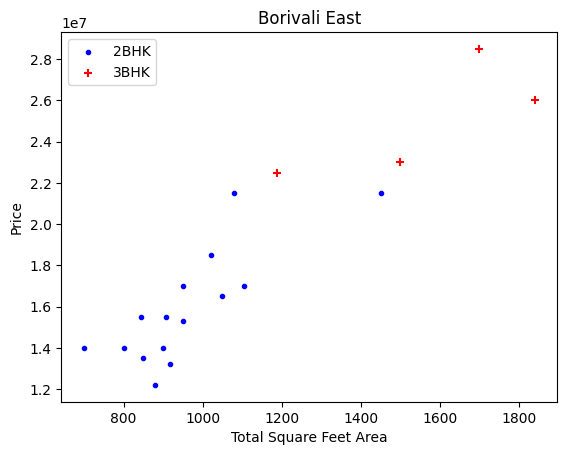

In [101]:
plot_scatter_chart(df4 , "Borivali East")

In [119]:
def removal_bhk_outliers(df):
    exclude_indices = np.array([])
    
    for location , location_df in df.groupby('Location'):
        bhk_stats= {}
        for bhk , bhk_df in location_df.groupby('No. of Bedrooms'):
            bhk_stats[bhk] = {
                'mean' : np.mean(bhk_df.price_per_area),
                'std' : np.std(bhk_df.price_per_area),
                'count' : bhk_df.shape[0]
            }
        for bhk , bhk_df in location_df.groupby('No. of Bedrooms'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_area < (stats['mean'])].index.values)
    return df.drop(exclude_indices , axis='index') 

In [120]:
df5 = removal_bhk_outliers(df4)
df5

,Price,Area,Location,No. of Bedrooms,Lift Available,Car Parking,price_per_area
0,6200000,400,Airoli,1,1,1,15500.000000
2,14900000,1245,Airoli,2,1,1,11967.871486
3,14000000,1183,Airoli,2,1,1,11834.319527
4,14800000,1245,Airoli,2,1,1,11887.550201
5,6400000,495,Airoli,1,0,0,12929.292929
...,...,...,...,...,...,...,...
4880,4500000,325,other,1,0,0,13846.153846
4881,4260000,695,other,1,1,0,6129.496403
4882,3500000,650,other,1,1,1,5384.615385
4883,2465000,700,other,1,0,0,3521.428571


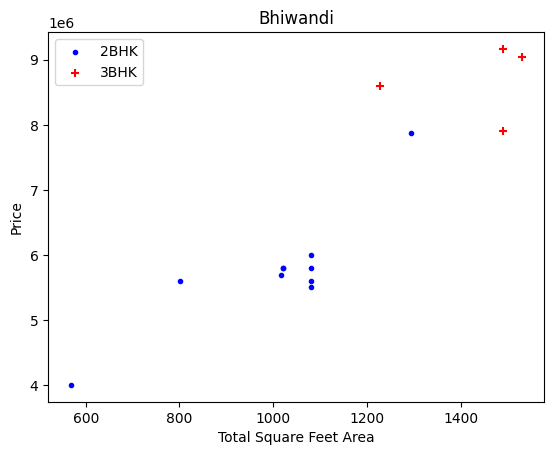

In [127]:
plot_scatter_chart(df4 , 'Bhiwandi')


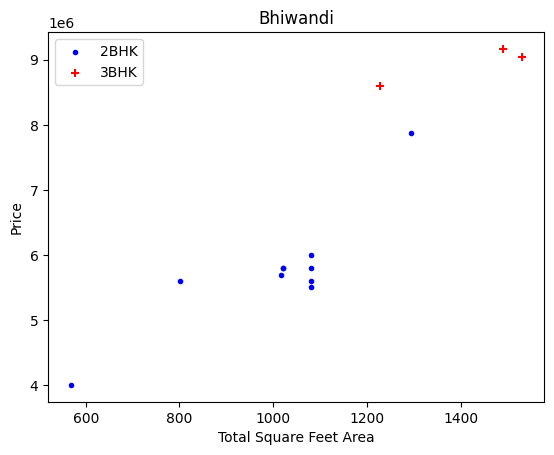

In [126]:
plot_scatter_chart(df5 , 'Bhiwandi')

Text(0, 0.5, 'Price')

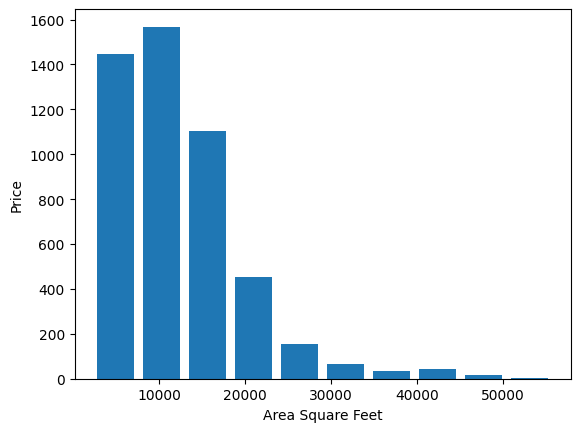

In [130]:
plt.hist(df4.price_per_area , rwidth=0.8)
plt.xlabel("Area Square Feet")
plt.ylabel("Price")


Text(0.5, 0, 'No. of Bedrooms')

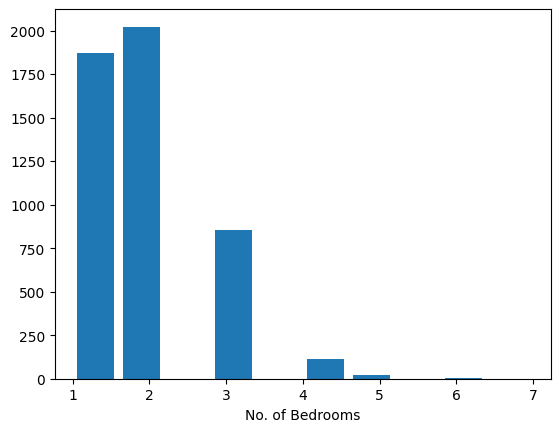

In [132]:
plt.hist(df4['No. of Bedrooms'] , rwidth=0.8)
plt.xlabel("No. of Bedrooms")
# plt.ylabel("Price")


In [134]:
df4.sample(10)

,Price,Area,Location,No. of Bedrooms,Lift Available,Car Parking,price_per_area
2665,3100000,540,Naigaon East,1,1,1,5740.740741
4147,29000000,1543,Wadala East Wadala,3,1,1,18794.556060
554,25000000,1250,Borivali West,3,1,0,20000.000000
258,3125000,615,Badlapur East,1,1,1,5081.300813
930,22000000,1290,Goregaon East,2,0,0,17054.263566
1511,13000000,800,Kandivali West,2,1,1,16250.000000
4108,2500000,540,Virar East,1,0,0,4629.629630
183,33000000,944,Andheri West,3,0,0,34957.627119
772,6800000,1120,Dombivali,3,1,1,6071.428571
544,40000000,2250,Borivali West,4,1,1,17777.777778


In [144]:
dummies = pd.get_dummies(df4.Location)

In [138]:
df4.Location.unique()

array(['Airoli', 'Ambernath East', 'Ambernath West', 'Andheri',
       'Andheri East', 'Andheri West', 'Badlapur East', 'Bandra East',
       'Bandra West', 'Belapur', 'Bhandup West', 'Bhayandar East',
       'Bhiwandi', 'Boisar', 'Borivali East', 'Borivali West', 'Chembur',
       'Chembur East', 'Dahisar', 'Dahisar East', 'Dahisar West',
       'Dattapada', 'Dombivali', 'Dombivali East', 'Dombivli (West)',
       'Dronagiri', 'Ghansoli', 'Ghatkopar', 'Ghatkopar West', 'Goregaon',
       'Goregaon East', 'Goregaon West', 'Jogeshwari West', 'Juhu',
       'Kalwa', 'Kalyan East', 'Kalyan West', 'Kamothe', 'Kandivali East',
       'Kandivali West', 'Kanjurmarg', 'Karanjade', 'Khar West',
       'Kharghar', 'Koper Khairane', 'Koproli', 'Kurla', 'Kurla West',
       'Magathane', 'Malad East', 'Malad West', 'Mira Road East',
       'Mira Road and Beyond', 'Mulund East', 'Mulund West',
       'Naigaon East', 'Nala Sopara', 'Nalasopara East',
       'Nalasopara West', 'Nerul', 'Palghar', 'Pan

In [145]:
locations = ['Airoli', 'Ambernath East', 'Ambernath West', 'Andheri',
       'Andheri East', 'Andheri West', 'Badlapur East', 'Bandra East',
       'Bandra West', 'Belapur', 'Bhandup West', 'Bhayandar East',
       'Bhiwandi', 'Boisar', 'Borivali East', 'Borivali West', 'Chembur',
       'Chembur East', 'Dahisar', 'Dahisar East', 'Dahisar West',
       'Dattapada', 'Dombivali', 'Dombivali East', 'Dombivli (West)',
       'Dronagiri', 'Ghansoli', 'Ghatkopar', 'Ghatkopar West', 'Goregaon',
       'Goregaon East', 'Goregaon West', 'Jogeshwari West', 'Juhu',
       'Kalwa', 'Kalyan East', 'Kalyan West', 'Kamothe', 'Kandivali East',
       'Kandivali West', 'Kanjurmarg', 'Karanjade', 'Khar West',
       'Kharghar', 'Koper Khairane', 'Koproli', 'Kurla', 'Kurla West',
       'Magathane', 'Malad East', 'Malad West', 'Mira Road East',
       'Mira Road and Beyond', 'Mulund East', 'Mulund West',
       'Naigaon East', 'Nala Sopara', 'Nalasopara East',
       'Nalasopara West', 'Nerul', 'Palghar', 'Panvel', 'Parel', 'Powai',
       'Sanpada', 'Santacruz East', 'Santacruz West', 'Seawoods',
       'Sector 17 Ulwe', 'Sector 20 Kharghar', 'Sector-18 Ulwe', 'Taloja',
       'Thane', 'Thane West', 'Titwala', 'Ulwe', 'Vasai', 'Vasai West',
       'Vasai east', 'Vashi', 'Ville Parle East', 'Virar', 'Virar East',
       'Virar West', 'Wadala', 'Wadala East Wadala', 'Worli',
       'matunga east', 'mumbai', 'other']

for location in locations:
    dummies[location].replace({True : 1 , False : 0} , inplace=True)

In [146]:
dummies.sample(10)

,Airoli,Ambernath East,Ambernath West,Andheri,Andheri East,Andheri West,Badlapur East,Bandra East,Bandra West,Belapur,...,Ville Parle East,Virar,Virar East,Virar West,Wadala,Wadala East Wadala,Worli,matunga east,mumbai,other
4121,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
847,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4328,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2850,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
589,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
710,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
741,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3228,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3978,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4851,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [147]:
df5 = pd.concat([df4 , dummies] , axis='columns')
df5.head()

,Price,Area,Location,No. of Bedrooms,Lift Available,Car Parking,price_per_area,Airoli,Ambernath East,Ambernath West,...,Ville Parle East,Virar,Virar East,Virar West,Wadala,Wadala East Wadala,Worli,matunga east,mumbai,other
0,6200000,400,Airoli,1,1,1,15500.000000,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9500000,1000,Airoli,2,1,1,9500.000000,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,14900000,1245,Airoli,2,1,1,11967.871486,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,14000000,1183,Airoli,2,1,1,11834.319527,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,14800000,1245,Airoli,2,1,1,11887.550201,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [191]:
df6 = df5.drop(['Location','price_per_area'] , axis='columns')

In [192]:
df6.sample(5)

,Price,Area,No. of Bedrooms,Lift Available,Car Parking,Airoli,Ambernath East,Ambernath West,Andheri,Andheri East,...,Ville Parle East,Virar,Virar East,Virar West,Wadala,Wadala East Wadala,Worli,matunga east,mumbai,other
3911,4500000,650,2,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2282,7240000,965,2,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
377,2350000,820,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4611,4500000,550,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2598,15500000,927,2,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [193]:
X = df6.drop('Price', axis='columns')
y = df6.Price

In [194]:
y.shape

(4885,)

In [195]:
X.shape

(4885, 94)

In [196]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [197]:
X_train, X_test, y_train, y_test = train_test_split(X , y , test_size=0.2 , random_state=10)

In [198]:
X_train.sample(10)

,Area,No. of Bedrooms,Lift Available,Car Parking,Airoli,Ambernath East,Ambernath West,Andheri,Andheri East,Andheri West,...,Ville Parle East,Virar,Virar East,Virar West,Wadala,Wadala East Wadala,Worli,matunga east,mumbai,other
3765,1075,2,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
745,1050,2,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
575,650,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2714,585,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4303,505,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2833,590,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4738,860,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1062,1051,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2142,650,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3778,1100,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [199]:
X_test.shape

(977, 94)

In [200]:
model = LinearRegression()
model.fit(X_train , y_train)
model.score(X_test , y_test)

0.8389766255826627

In [201]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5 , test_size=0.2 , random_state=0)
cross_val_score(LinearRegression() , X , y , cv=cv)

array([0.84458958, 0.84727726, 0.839798  , 0.85347781, 0.84602931])

In [223]:
def predict_price(area ,location ,bedrooms ,lift ,carPark ):
    
    loc_index = np.where(X.columns==location)[0][0]
    x = np.zeros(len(X.columns))
    x[0] = area
    x[1] = bedrooms
    x[2] = lift
    x[3] = carPark
    
    if loc_index >= 0:
        x[loc_index] = 1
    return model.predict([x])[0]

In [224]:
predict_price(1000 , 'Bhiwandi' , 2 , 1 , 0)

/home/adarsh/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


5243360.0

In [225]:
predict_price(1000 , 'Borivali East' , 2 , 1 , 0)

/home/adarsh/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


16462757.0

In [226]:
import pickle
with open('mumbai_home_price_prediction_model.pickle' , 'wb') as file:
    pickle.dump(model , file)

In [227]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}

with open("columns.json" , 'w') as file:
    file.write(json.dumps(columns))